# TASK 2 


<h3>Made By : Vandit Manish Jain</h3>

<p><b>
Problem Statement:
What will be predicted score if a student study for 9.25 hrs in a day?
    </b></p>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.isnull(). sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>Relationship between the data</h3>


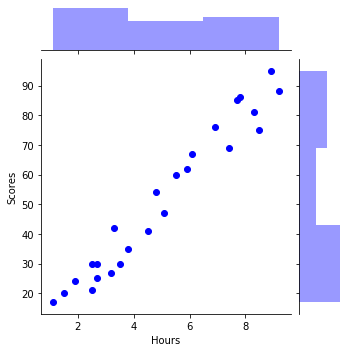

In [11]:
sns.jointplot(x="Hours",y="Scores",data=df,kind="scatter",color="b", height=5)

<p><b>Graph shows a positive linear relation between the data.</b></p>

<p><b>X-Y Split</b></p>

In [12]:
X=df[["Hours"]]
print(type(X))
print(X.shape)
X.head()

<class 'pandas.core.frame.DataFrame'>
(25, 1)


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
Y=df.Scores
print(type(Y))
print(Y.shape)
Y.head()

<class 'pandas.core.series.Series'>
(25,)


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

<p><b>Test train split</b></p>

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

<p><b>Train linear regression</b></p>

In [16]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<p><b>Interpreting Model Coefficient</b></p>

In [17]:
print(linreg.intercept_)
print(linreg.coef_)

2.018160041434683
[9.91065648]


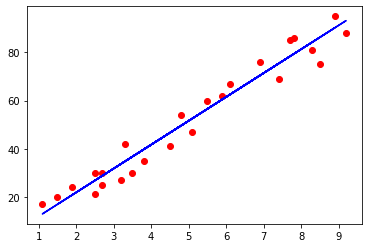

In [19]:
#PLotting regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting test data
plt.scatter(X, Y,color="r")
plt.plot(X, line, color="blue");
plt.show()

<p><b>Making Predictions with the Model</b></p>

In [20]:
Y_pred = linreg.predict(X_test)
Y_pred[:5]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


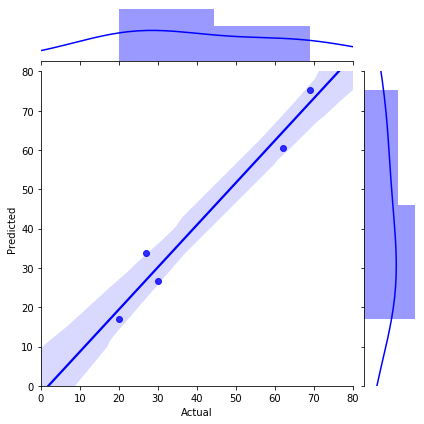

In [23]:
sns.jointplot(x="Actual",y="Predicted",xlim=(0,80),ylim=(0,80),data=df1,kind="reg",color="Blue")

<p><b>Prediction of 9.25 hours of studying.</b></p>

In [25]:
hours = 9.25
my_pred = linreg.predict([[hours]])
print("Predicted Score of a student who studies for {} hours a day is {} ".format(hours,my_pred[0]))

Predicted Score of a student who studies for 9.25 hours a day is 93.69173248737538 


<p><b>Prediction on any value</b></p>

In [26]:
#input from user
hours = float(input("Enter the amount of hours a student studied:"))
my_pred = linreg.predict([[hours]])
print("Predicted Score of a student who studies for {} hours a day is {} ".format(hours,my_pred[0]))

Enter the amount of hours a student studied:7.5
Predicted Score of a student who studies for 7.5 hours a day is 76.34808364625145 
